# Credal sets and classifiers

The theory of imprecise probabilities (Walley, 1991) is largely built on the idea to specify
knowledge in terms of a set $Q$ of probability distributions instead of a single distribution.
In the literature, such sets are also referred to as *credal sets*, and often assumed to be
convex (i.e.,$q , q' \in Q$ implies $\alpha q + (1-\alpha) q' \in Q$ for all $\alpha \in [0,1]$).
The concept of credal
sets and related notions provide the basis of a generalization of Bayesian inference, which
is especially motivated by the criticism of non-informative priors as models of ignorance
in standard Bayesian inference (cf. Section 3.3). The basic idea is to replace a single
prior distribution on the model space, as used in Bayesian inference, by a (credal) set of
candidate priors. Given a set of observed data, Bayesian inference can then be applied
to each candidate prior, thereby producing a (credal) set of posteriors. Correspondingly,
any value or quantity derived from a posterior (e.g., a prediction, an expected value,
etc.) is replaced by a set of such values or quantities. An important example of such
an approach is robust inference for categorical data with the imprecise Dirichlet model,
which is an extension of inference with the Dirichlet distribution as a conjugate prior for
the multinomial distribution (Bernardo, 2005).

In [131]:
# visualize credal sets simplex

In [133]:
# example dirichlet model

Methods of that kind have also been used in the context of machine learning, for example in the framework of the Na\"ive Credal Classifier \citep{zaffalon2002,cora_lr08} or more recently as an extension of sum-product networks \citep{dera_cs17}. As for the former, we can think of a Na\"ive Bayes (NB) classifier as a hypothesis $h = h_{\vec{\theta}}$ specified by a parameter vector ${\vec{\theta}}$ that comprises a prior probability $\theta_k$ for each class $y_k \in \set{Y}$ and a conditional probability $\theta_{i,j,k}$ for observing the $i^{th}$ value $a_{i,j}$ of the $j^{th}$ attribute given class $y_k$. For a given query instance specified by attributes $(a_{i_1,1}, \ldots , a_{i_J,J})$, the posterior class probabilities are then given by
$$
\begin{equation}\label{eq:spo}
p(y_k | a_{i_1,1}, \ldots , a_{i_J,J}) \propto \theta_k \prod_{j=1}^J \theta_{i_j,j,k} \, .
\end{equation}
$$

In the Na\"ive Credal Classifier, the $\theta_k$ and $\theta_{i_j,j,k}$ are specified in terms of (local) credal sets\footnote{These could be derived from empirical data, for example, by doing generalized Bayesian inference with the imprecise Dirichlet model.}, i.e., there is a class of probability distributions $Q$ on $\set{Y}$ playing the role of candidate priors, and a class of probability distributions $Q_{j,k}$ specifying possible distributions on the attribute values of the $j^{th}$ attribute given class $y_k$. A single posterior class probability (\ref{eq:spo}) is then replaced by the set (interval) of such probabilities that can be produced by taking $\theta_k$ from a distribution in $Q$ and $\theta_{i_j,j,k}$ from a distribution in $Q_{j,k}$. As an aside, let us note that the computations involved may of course become costly. 


In [132]:
# example naive bayes vs naive credal classifier ?

## Uncertainty measures for credal sets

Interestingly, there has been quite some work on defining uncertainty measures for credal sets and related representation, such as Dempster-Shafer evidence theory \citep{klir_mo94}. Even more interestingly, a basic distinction between two types of uncertainty contained in a credal set, referred to as *conflict* (randomness, discord) and *non-specificity*, respectively, has been made by \cite{yage_ea83}. The importance of this distinction was already emphasized by \cite{kolm_ta65}. These notions are in direct correspondence with what we call aleatoric and epistemic uncertainty. 

The standard uncertainty measure in classical possibility theory (where uncertain information is simply represented in the form of subsets $A \subseteq \mathcal{Y}$ of possible alternatives) is the Hartley measure\footnote{Be aware that we denote both the Hartley measure and the Shannon entropy by $H$, which is common in the literature. The meaning should be clear from the context.}  \citep{hart_to28}

$$
\begin{equation}\label{eq:hartley}
H(A) = \log( |A|)  \, ,
\end{equation}
$$



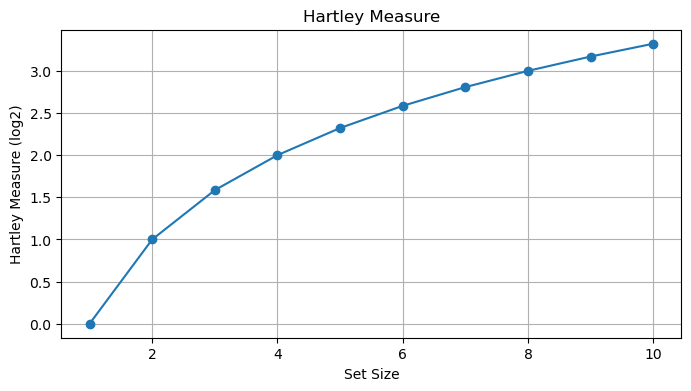

In [124]:
def hartley_measure(A):
    return np.log2(len(A))

A = {1, 2, 3, 4}
hartley_measure(A)

set_sizes = range(1, 11)
hartley_values = [hartley_measure(set(range(1, size + 1))) for size in set_sizes]

plt.figure(figsize=(8, 4))
plt.plot(set_sizes, hartley_values, marker='o')
plt.title('Hartley Measure')
plt.xlabel('Set Size')
plt.ylabel('Hartley Measure (log2)')
plt.grid(True)
plt.show()

Just like the Shannon entropy (\ref{eq:shannon}), this measure can be justified axiomatically\footnote{For example, see Chapter IX, pages 540--616, in the book by \cite{reny_pt}.}. 

Given the insight that conflict and non-specificity are two different, complementary sources of uncertainty, and standard (Shannon) entropy and (\ref{eq:hartley}) as well-established measures of these two types of uncertainty, a natural question in the context of credal sets is to ask for a generalized representation

$$
\begin{equation}\label{eq:aggregate}
\text{U}(Q) = \text{AU}(Q) + \text{EU}(Q) \, ,
\end{equation}
$$

where $\text{U}$ is a measure of total (aggregate) uncertainty, $\text{AU}$ a measure of aleatoric uncertainty (conflict, a generalization of the Shannon entropy), and $\text{EU}$ a measure of epistemic uncertainty (non-specificity, a generalization of the Hartely measure). 

As for the non-specificity part in (\ref{eq:aggregate}), the following generalization of the Hartley measure to the case of graded possibilities has been proposed by various authors \citep{abel_an00}:

$$
\begin{equation}\label{eq:gh}
\text{GH}(Q) \defeq  \sum_{A \subseteq \mathcal{Y}} \text{m}_Q(A) \, \log(|A|) \,,
\end{equation}
$$

where $\text{m}_Q: \,  2^{\mathcal{Y}} \longrightarrow [0,1]$ is the M\"obius inverse of the capacity function $\nu :\, 2^{\mathcal{Y}} \longrightarrow [0,1]$ defined by

\begin{equation}\label{eq:cap}
\nu_Q(A) \defeq \inf_{q \in Q} q(A) 
\end{equation}

for all $A \subseteq \mathcal{Y}$, that is,

$$
\text{m}_Q(A) = \sum_{B \subseteq A} (-1)^{|A \setminus B|} \nu_Q(B) \, .
$$

The measure (\ref{eq:gh}) enjoys several desirable axiomatic properties, and its uniqueness was shown by \cite{klir_ot87}.

In [125]:
from itertools import chain, combinations

In [127]:
def powerset(A):
    s = list(A)
    return {frozenset(comb) for comb in chain.from_iterable(combinations(s, r) for r in range(len(s) + 1))}

def p_event(A, q):
    return sum([q[a] for a in A])
    
def vq(A, Q):
    return np.min([p_event(A, q) for q in Q])

def mq(A, Q):
    mq = sum([((-1)**len(A-B))*vq(B,Q) for B in powerset(A)])
    return mq

def GH(Q, U):
    return sum([mq(A, Q)*np.log2(len(A)) for A in powerset(U) if len(A)])

In [173]:
U = {'A', 'B', 'C'}
Q = [
    {'A': 0.5, 'B': 0.3, 'C': 0.2},
    {'A': 0.6, 'B': 0.3, 'C': 0.1},
    {'A': 0.6, 'B': 0.2, 'C': 0.2}
]

In [174]:
GH(Q, U)

0.14150374992788448

The generalization of the Shannon entropy $H$ as a measure of conflict turned out to be more difficult. The upper and lower Shannon entropy play an important role in this regard: 

$$
\begin{equation}\label{eq:gg}
H^*(Q) \defeq \max_{q \in Q} H(q) \, , \quad
H_*(Q) \defeq \min_{q \in Q} H(q)
\end{equation}
$$


In [182]:
def shannon_entropy(q):
    return -sum([p * np.log2(p) for p in q.values()])

def upper_shannon(Q):
    return np.max([shannon_entropy(q) for q in Q])

def lower_shannon(Q):
    return np.min([shannon_entropy(q) for q in Q])

In [183]:
upper_shannon(Q)

1.4854752972273344

In [184]:
lower_shannon(Q)

1.295461844238322

Based on these measures, the following disaggregations of total uncertainty (\ref{eq:aggregate}) have been proposed \citep{abel_dt06}:

$$
\begin{align}
H^*(Q) & = \big(H^*(Q) - \text{GH}(Q) \big)  + \text{GH}(Q)  \label{eq:unc1} \\
H^*(Q) & = H_*(Q)  + \big(H^*(Q) - H_*(Q) \big)   \label{eq:unc2}
\end{align}
$$

In both cases, upper entropy serves as a measure of total uncertainty $U(Q)$, which is again justified on an axiomatic basis. In the first case, the generalized Hartley measure is used for quantifying epistemic uncertainty, and aleatoric uncertainty is obtained as the difference between total and epistemic uncertainty. In the second case, epistemic uncertainty is specified in terms of the difference between upper and lower entropy.  

## Set-valued prediction